# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

If you completed the first term of this program, you will be familiar with the first part of this project, from the unsupervised learning project. The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# magic word for producing visualizations in notebook
%matplotlib inline

## Part 1: Get to Know the Data

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

## 1. 1. Load of the data

In [2]:
# load in the data
data_folder = "data"
azdias_filename = "Udacity_AZDIAS_052018_small.csv"
customers_filename = "Udacity_CUSTOMERS_052018.csv"
attributes_filename = "DIAS Attributes - Values 2017.xlsx"
info_filename = "DIAS Information Levels - Attributes 2017.xlsx"

azdias_df = pd.read_csv(os.path.join(data_folder, azdias_filename), sep=',')
customers_df = pd.read_csv(os.path.join(data_folder, customers_filename), sep=',')
attributes_df = pd.read_excel(os.path.join(data_folder, attributes_filename), sep=',', header=1)
info_df = pd.read_excel(os.path.join(data_folder, info_filename), sep=',', header=1)

C:\Users\gobro\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 1. 2. Data exploration

### 1. 2. 1 Global

In [3]:
azdias_df.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [4]:
azdias_df.shape

(50000, 366)

In [5]:
customers_df.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
3,143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3


In [6]:
customers_df.shape

(191652, 369)

In [7]:
attributes_df.head()

,Unnamed: 0,Attribute,Description,Value,Meaning
0,NaN,AGER_TYP,best-ager typology,-1,unknown
1,NaN,NaN,NaN,0,no classification possible
2,NaN,NaN,NaN,1,passive elderly
3,NaN,NaN,NaN,2,cultural elderly
4,NaN,NaN,NaN,3,experience-driven elderly


In [8]:
info_df.head()

,Unnamed: 0,Information level,Attribute,Description,Additional notes
0,NaN,NaN,AGER_TYP,best-ager typology,in cooperation with Kantar TNS; the informatio...
1,NaN,Person,ALTERSKATEGORIE_GROB,age through prename analysis,modelled on millions of first name-age-referen...
2,NaN,NaN,ANREDE_KZ,gender,NaN
3,NaN,NaN,CJT_GESAMTTYP,Customer-Journey-Typology relating to the pref...,"relating to the preferred information, marketi..."
4,NaN,NaN,FINANZ_MINIMALIST,financial typology: low financial interest,Gfk-Typology based on a representative househo...


In [9]:
azdias_df.describe().transpose().head(10)

,count,mean,std,min,25%,50%,75%,max
LNR,50000.0,636694.940380,253741.904241,199483.0,412012.75,639680.5,860879.5,1081513.0
AGER_TYP,50000.0,-0.346020,1.211726,-1.0,-1.00,-1.0,-1.0,3.0
AKT_DAT_KL,46266.0,4.468595,3.652455,1.0,1.00,3.0,9.0,9.0
ALTER_HH,46266.0,10.812627,7.650064,0.0,0.00,13.0,17.0,21.0
ALTER_KIND1,4517.0,11.738543,4.108855,2.0,8.00,12.0,15.0,18.0
ALTER_KIND2,1593.0,13.328939,3.285956,4.0,11.00,14.0,16.0,18.0
ALTER_KIND3,337.0,14.350148,2.806605,5.0,13.00,15.0,17.0,18.0
ALTER_KIND4,61.0,14.704918,2.945869,8.0,13.00,15.0,17.0,18.0
ALTERSKATEGORIE_FEIN,35443.0,13.689050,5.088174,0.0,11.00,14.0,17.0,25.0
ANZ_HAUSHALTE_AKTIV,45197.0,8.375578,15.324759,0.0,2.00,4.0,10.0,367.0


## 1. 3 Data cleaning

In This section, we will clean the data. <br/>

0. Fill the nan values in attributes_df
1. Remove "LNR" column that represent a identifier and not a feature <br/>
2. Check and correct the problem appearing column 18 and 19 <br/>
3. Remove the features for which we have no information <br/>
4. Replace the "unknown" different values by np.nan <br/>

## 1. 3. 0. Fill the nan values in attributes_df

In [10]:
attributes_df.head()

,Unnamed: 0,Attribute,Description,Value,Meaning
0,NaN,AGER_TYP,best-ager typology,-1,unknown
1,NaN,NaN,NaN,0,no classification possible
2,NaN,NaN,NaN,1,passive elderly
3,NaN,NaN,NaN,2,cultural elderly
4,NaN,NaN,NaN,3,experience-driven elderly


In [11]:
# we suppress the ""Unnamed: 0" column
attributes_df = attributes_df.drop("Unnamed: 0", axis=1)
info_df = info_df.drop("Unnamed: 0", axis=1)

# We fill the attribute name and the description for all the rows in attribute_df
for row in range(attributes_df.shape[0]):
    if attributes_df["Attribute"].isna().iloc[row]==False:
        attribute_name = attributes_df["Attribute"].iloc[row]
        description = attributes_df["Description"].iloc[row]
    else:
        attributes_df["Attribute"].iloc[row] = attribute_name
        attributes_df["Description"].iloc[row] = description
    if attributes_df["Meaning"].isna().iloc[row]==False:
        meaning_name = attributes_df["Meaning"].iloc[row]
    else:
        attributes_df["Meaning"].iloc[row] = meaning_name

In [12]:
attributes_df.head()

,Attribute,Description,Value,Meaning
0,AGER_TYP,best-ager typology,-1,unknown
1,AGER_TYP,best-ager typology,0,no classification possible
2,AGER_TYP,best-ager typology,1,passive elderly
3,AGER_TYP,best-ager typology,2,cultural elderly
4,AGER_TYP,best-ager typology,3,experience-driven elderly


## 1. 3. 1. Check the features that are common or not to the dataframes

In [13]:
def set_diff(set_1, set_2):
    A_B = len(set_1 - set_2)
    B_A = len(set_2 - set_1)
    diff = A_B + B_A
    return diff

attributes_df_att = set(attributes_df["Attribute"].values)
info_df_att = set(info_df["Attribute"].values)
azdias_df_att = set(azdias_df.columns)
customers_df_att = set(customers_df.columns)

attributes_diff = pd.DataFrame(index=['attributes_df', 'info_df', 'azdias_df', "customers_df"], columns=['attributes_df', 'info_df', 'azdias_df', "customers_df"])
for n in attributes_diff.columns:
    attributes_diff.loc[n, n] = 0


attributes_diff.loc["attributes_df", "info_df"]  = set_diff(attributes_df_att, info_df_att)
attributes_diff.loc["attributes_df", "azdias_df"]  = set_diff(attributes_df_att, azdias_df_att)
attributes_diff.loc["attributes_df", "customers_df"]  = set_diff(attributes_df_att, customers_df_att)
attributes_diff.loc["info_df", "azdias_df"]  = set_diff(info_df_att, azdias_df_att)
attributes_diff.loc["info_df", "customers_df"]  = set_diff(info_df_att, customers_df_att)
attributes_diff.loc["azdias_df", "customers_df"]  = set_diff(azdias_df_att, customers_df_att)

print("Uncommon attributes between dataframes :")
attributes_diff.head()

Uncommon attributes between dataframes :


,attributes_df,info_df,azdias_df,customers_df
attributes_df,0,27,136,139
info_df,NaN,0,151,154
azdias_df,NaN,NaN,0,3
customers_df,NaN,NaN,NaN,0


**We can see that attributes does not match between dataframes.**

In [14]:
# attributes non common between azdias_df and customers_df
customers_df_att - azdias_df_att

{'CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP'}

It make sense that these attributes does not appear in azdias since they are specific to established customers. We suppress them from customers_df

In [15]:
customers_df.drop(list(customers_df_att - azdias_df_att), axis=1, inplace=True)

In [16]:
# attributes non common between azdias_df and attributes_df

pd.set_option('display.max_columns', 500)
col_diff_df = pd.DataFrame(columns=['azdias_df','attributes_df'])
azdias_df_cols = set(azdias_df.columns)
attributes_df_cols = set(attributes_df["Attribute"])

for n, attribute_name in enumerate(np.sort(list(azdias_df_cols|attributes_df_cols))):
    
    if attribute_name in azdias_df_cols:
        azdias_col = attribute_name
    else:
        azdias_col = "?"
        
    if attribute_name in attributes_df_cols:
        attributes_col = attribute_name
    else:
        attributes_col = "?"
        
    col_diff_df = col_diff_df.append({'azdias_df': azdias_col, 'attributes_df': attributes_col}, ignore_index=True)
    
col_diff_df.head(410).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407
azdias_df,AGER_TYP,AKT_DAT_KL,ALTERSKATEGORIE_FEIN,ALTERSKATEGORIE_GROB,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ANREDE_KZ,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,?,CAMEO_DEUG_2015,?,CAMEO_DEU_2015,CAMEO_INTL_2015,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,?,D19_BANKEN_GROSS,?,D19_BANKEN_LOKAL,?,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_ONLINE_DATUM,D19_BANKEN_ONLINE_QUOTE_12,D19_BANKEN_REST,?,D19_BEKLEIDUNG_GEH,?,D19_BEKLEIDUNG_REST,?,D19_BILDUNG,?,D19_BIO_OEKO,?,D19_BUCH_CD,?,D19_DIGIT_SERV,?,D19_DROGERIEARTIKEL,?,D19_ENERGIE,?,D19_FREIZEIT,?,D19_GARTEN,?,D19_GESAMT_ANZ_12,D19_GESAMT_ANZ_24,D19_GESAMT_DATUM,D19_GESAMT_OFFLINE_DATUM,D19_GESAMT_ONLINE_DATUM,D19_GESAMT_ONLINE_QUOTE_12,D19_HANDWERK,?,D19_HAUS_DEKO,?,D19_KINDERARTIKEL,?,?,D19_KONSUMTYP,D19_KONSUMTYP_MAX,D19_KOSMETIK,?,D19_LEBENSMITTEL,?,D19_LETZTER_KAUF_BRANCHE,D19_LOTTO,?,D19_NAHRUNGSERGAENZUNG,?,D19_RATGEBER,?,D19_REISEN,?,D19_SAMMELARTIKEL,?,D19_SCHUHE,?,D19_SONSTIGE,?,D19_SOZIALES,D19_TECHNIK,?,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE,?,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_ONLINE_QUOTE_12,D19_TELKO_REST,?,D19_TIERARTIKEL,?,D19_VERSAND_ANZ_12,D19_VERSAND_ANZ_24,D19_VERSAND_DATUM,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_ONLINE_DATUM,D19_VERSAND_ONLINE_QUOTE_12,D19_VERSAND_REST,?,D19_VERSICHERUNGEN,?,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,D19_VOLLSORTIMENT,?,D19_WEIN_FEINKOST,?,DSL_FLAG,EINGEFUEGT_AM,EINGEZOGENAM_HH_JAHR,EWDICHTE,EXTSEL992,FINANZTYP,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FIRMENDICHTE,GEBAEUDETYP,GEBAEUDETYP_RASTER,GEBURTSJAHR,GEMEINDETYP,?,GFK_URLAUBERTYP,GREEN_AVANTGARDE,?,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSAQUOT,KBA05_KRSHERST1,KBA05_KRSHERST2,KBA05_KRSHERST3,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,K

**Some of the column names does not match or does not exist in both dataframes**

## 1. 3. 2. Remove "LNR" column that represent an identifier and not a feature

In [17]:
# "LNR" looks like an identifier. We can supress it.
customers_df = customers_df.drop("LNR", axis=1)
azdias_df = azdias_df.drop("LNR", axis=1)

## 1. 3. 3.  Check and correct the problem appearing column 18 and 19

We see the following message appearing when we load the data : <br/>
3063: DtypeWarning: Columns (18,19) have mixed types.

In [18]:
# check the values or the two corresponding columns :
print(azdias_df.iloc[:,18].unique())
print(azdias_df.iloc[:,19].unique())
print("columns names : {}".format(list(azdias_df.columns[17:19])))

[nan 51.0 24.0 12.0 43.0 54.0 22.0 14.0 13.0 15.0 33.0 41.0 34.0 55.0 25.0
 23.0 31.0 52.0 35.0 45.0 44.0 32.0 '22' '24' '41' '12' '54' '51' '44'
 '35' '23' '25' '14' '34' '52' '55' '31' '32' '15' '13' '43' '33' '45'
 'XX']
[ 2.  5.  3.  4.  1.  6. nan]
columns names : ['CAMEO_DEUG_2015', 'CAMEO_INTL_2015']


We notice indeed that the types are mixed, and we do have 'X and 'XX' where we have to find the meaning using attributes_df. The column 'CAMEO_INTL_2015' can't be found in the attributes_df, however a "CAMEO_DEUINTL_2015" exists.

In [19]:
np.transpose(list(attributes_df[attributes_df["Attribute"]=='CAMEO_DEUINTL_2015']["Value"]))

array([-1, 11, 12, 13, 14, 15, 21, 22, 23, 24, 25, 31, 32, 33, 34, 35, 41,
       42, 43, 44, 45, 51, 52, 53, 54, 55])

In [20]:
np.transpose(list(attributes_df[attributes_df["Attribute"]=='CAMEO_DEUINTL_2015']["Value"]))

array([-1, 11, 12, 13, 14, 15, 21, 22, 23, 24, 25, 31, 32, 33, 34, 35, 41,
       42, 43, 44, 45, 51, 52, 53, 54, 55])

**No "X" or "XX" are explained and are just probably unknown values. We will take care or homogenize the unknow values and the datatype in these 2 columns.**

In [21]:
# replace 'X' and 'XX' values by corresponding "unknown" values for 'CAMEO_INTL_2015' and 'CAMEO_DEUG_2015'
def homogenize_column(df, col_names, n_wrong_value, unknown_value):
    for col, wrong_value in zip(col_names, n_wrong_value):
        df[col] = df[col].replace({wrong_value: unknown_value})
        df[col] = df[col].astype(float)
    return df

azdias_df = homogenize_column(azdias_df, ['CAMEO_INTL_2015', 'CAMEO_DEUG_2015'], ['XX', 'X'], -1) 
customers_df = homogenize_column(customers_df, ['CAMEO_INTL_2015', 'CAMEO_DEUG_2015'], ['XX', 'X'], -1) 

## 1. 3. 4. Remove the features for which we have no information <br/>

In [22]:
def remove_unknown_attributes(df, attributes_df):
    df_cols = list(df.columns)
    attributes = list(attributes_df["Attribute"])
    for attribute_name in list(df_cols):
        # The column 'CAMEO_INTL_2015' can't be found in the attributes_df, however a "CAMEO_DEUINTL_2015" exists in attributes_df.
        if attribute_name == 'CAMEO_INTL_2015':
            df.rename(columns={attribute_name:'CAMEO_DEUINTL_2015'}, inplace=True)
        else:
            if attribute_name not in attributes:
                df.drop(attribute_name, axis=1, inplace=True)
    return df
            
azdias_df = remove_unknown_attributes(azdias_df, attributes_df)
customers_df = remove_unknown_attributes(customers_df, attributes_df)

In [23]:
azdias_df.head()

,AGER_TYP,ALTER_HH,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_DEUINTL_2015,CJT_GESAMTTYP,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_ONLINE_DATUM,D19_BANKEN_ONLINE_QUOTE_12,D19_GESAMT_ANZ_12,D19_GESAMT_ANZ_24,D19_GESAMT_DATUM,D19_GESAMT_OFFLINE_DATUM,D19_GESAMT_ONLINE_DATUM,D19_GESAMT_ONLINE_QUOTE_12,D19_KONSUMTYP,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_VERSAND_ANZ_12,D19_VERSAND_ANZ_24,D19_VERSAND_DATUM,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_ONLINE_DATUM,D19_VERSAND_ONLINE_QUOTE_12,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,EWDICHTE,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,GEBAEUDETYP,GEBAEUDETYP_RASTER,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSAQUOT,KBA05_KRSHERST1,KBA05_KRSHERST2,KBA05_KRSHERST3,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG2,KBA05_SEG3,KBA05_SEG4,KBA05_SEG5,KBA05_SEG6,KBA05_SEG7,KBA05_SEG8,KBA05_SEG9,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA05_ZUL4,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_40,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_55,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HALTER_66,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_HERST_SONST,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_211,KBA13_KMH_250,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,KBA13_KW_90,KBA13_MAZDA,KBA13_MERCEDES,KBA13_MOTOR,KBA13_NISSAN,KBA13_OPEL,KBA13_PEUGEOT,KBA13_RENAULT,KBA13_SEG_GELAENDEWAGEN,KBA13_SEG_GROSSRAUMVANS,KBA13_SEG_KLEINST,KBA13_SEG_KLEINWAGEN,KBA13_SEG_KOMPAKTKLASSE,KBA13_SEG_MINIVANS,KBA13_SEG_MINIWAGEN,KBA13_SEG_MITTELKLASSE,KBA13_SEG_OBEREMITTELKLASSE,KBA13_SEG_OBERKLASSE,KBA13_SEG_SONSTIGE,KBA13_SEG_SPORTWAGEN,KBA13_SEG_UTILITIES,KBA13_SEG_VAN,KBA13_SEG_WOHNMOBILE,KBA13_SITZE_4,KBA13_SITZE_5,KBA13_SITZE_6,KBA13_TOYOTA,KBA13_VORB_0,KBA13_VORB_1,KBA13_VORB_1_2,KBA13_VORB_2,KBA13_VORB_3,KBA13_VW,KKK,KONSUMNAEHE,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,MIN_GEBAEUDEJAHR,MOBI_REGIO,NATIONALITAET_KZ,ONLINE_AFFINITAET,ORTSGR_KLS9,OST_WEST_KZ,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_GBZ,PLZ8_HHZ,PRAEGENDE_JUGENDJAHRE,REGIOTYP,RELAT_AB,RETOURTYP_BK_S,SEMIO_DOM,SEMIO_ERL,SEMIO_FAM,SEMIO_KAEM,SEMIO_KRIT,SEMIO_KULT,SEMIO_LUST,SEMIO_MAT,SEMIO_PFLICHT,SEMIO_RAT,SEMIO_REL,SEMIO_SOZ,SEMIO_TRADV,SEMIO_VERT,SHOPPER_TYP,TITEL_KZ,VERS_TYP,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE

## 1. 3. 5. Check the features with several values / meaning

Let's chek which attribute has more values than meaning, and let's modify them so that they have only one value per meaning

In [24]:
attributes_multiple_val = []
attributes = set(attributes_df["Attribute"])
for attribute in attributes:
    n_values = len(set(attributes_df[attributes_df["Attribute"]==attribute]["Value"].values))
    n_meanings = len(set(attributes_df[attributes_df["Attribute"]==attribute]["Meaning"].values))
    if n_values > n_meanings:
        attributes_multiple_val.append(attribute)
attributes_multiple_val

['LP_STATUS_GROB', 'LP_FAMILIE_GROB']

In [25]:
attributes_df[attributes_df["Attribute"]=='LP_STATUS_GROB']

,Attribute,Description,Value,Meaning
1976,LP_STATUS_GROB,social status rough,1,low-income earners
1977,LP_STATUS_GROB,social status rough,2,low-income earners
1978,LP_STATUS_GROB,social status rough,3,average earners
1979,LP_STATUS_GROB,social status rough,4,average earners
1980,LP_STATUS_GROB,social status rough,5,average earners
1981,LP_STATUS_GROB,social status rough,6,independants
1982,LP_STATUS_GROB,social status rough,7,independants
1983,LP_STATUS_GROB,social status rough,8,houseowners
1984,LP_STATUS_GROB,social status rough,9,houseowners
1985,LP_STATUS_GROB,social status rough,10,top earners


In [26]:
azdias_df['LP_STATUS_GROB'].unique()

array([ 1.,  2.,  4.,  5.,  3., nan])

In [27]:
attributes_df[attributes_df["Attribute"]=='LP_FAMILIE_GROB']

,Attribute,Description,Value,Meaning
1903,LP_FAMILIE_GROB,familytyp rough,1,single
1904,LP_FAMILIE_GROB,familytyp rough,2,couple
1905,LP_FAMILIE_GROB,familytyp rough,3,single parent
1906,LP_FAMILIE_GROB,familytyp rough,4,single parent
1907,LP_FAMILIE_GROB,familytyp rough,5,single parent
1908,LP_FAMILIE_GROB,familytyp rough,6,family
1909,LP_FAMILIE_GROB,familytyp rough,7,family
1910,LP_FAMILIE_GROB,familytyp rough,8,family
1911,LP_FAMILIE_GROB,familytyp rough,9,multiperson household
1912,LP_FAMILIE_GROB,familytyp rough,10,multiperson household


In [28]:
azdias_df['LP_FAMILIE_GROB'].unique()

array([ 2.,  3.,  1.,  0.,  5.,  4., nan])

**The values in the attribute_df for "LP_FAMILIE_GROB" and "LP_STATUS_GROB" the values that we have in the azdias does not seem to match... Probably the information about the values have not been updated... However, I suppose here that as zero does not match to anything, it should be "unknown" values. I update the attribute_df with this new category for both features.**

In [29]:
for attribute in attributes_multiple_val:
    description = attributes_df[attributes_df["Attribute"]==attribute]["Description"].values[0]
    attributes_df = attributes_df.append({'Attribute' : attribute , 'Description' : description, "Value" : 0, "Meaning" : "unknown"} , ignore_index=True)
    # print(attributes_df[attributes_df["Attribute"]==attribute]["Value"])

In [30]:
attributes_df[attributes_df["Attribute"]=='LP_FAMILIE_GROB'].head(15)

,Attribute,Description,Value,Meaning
1903,LP_FAMILIE_GROB,familytyp rough,1,single
1904,LP_FAMILIE_GROB,familytyp rough,2,couple
1905,LP_FAMILIE_GROB,familytyp rough,3,single parent
1906,LP_FAMILIE_GROB,familytyp rough,4,single parent
1907,LP_FAMILIE_GROB,familytyp rough,5,single parent
1908,LP_FAMILIE_GROB,familytyp rough,6,family
1909,LP_FAMILIE_GROB,familytyp rough,7,family
1910,LP_FAMILIE_GROB,familytyp rough,8,family
1911,LP_FAMILIE_GROB,familytyp rough,9,multiperson household
1912,LP_FAMILIE_GROB,familytyp rough,10,multiperson household


## 1. 3. 6. Identify and transform the features with str values into float values

In [31]:
azdias_df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

We have to check the feature for which the type is different from integer or float because it won't be accepted for modelling.

In [32]:
string_features = []
for col in azdias_df.columns:
    if azdias_df[col].dtypes=='O':
        string_features.append(col)
string_features

['CAMEO_DEU_2015', 'OST_WEST_KZ']

In [33]:
attributes_df[attributes_df["Attribute"]==string_features[0]].head()

,Attribute,Description,Value,Meaning
61,CAMEO_DEU_2015,CAMEO classification 2015 - detailled classifi...,1A,Work-Life-Balance
62,CAMEO_DEU_2015,CAMEO classification 2015 - detailled classifi...,1B,Wealthy Best Ager
63,CAMEO_DEU_2015,CAMEO classification 2015 - detailled classifi...,1C,Successful Songwriter
64,CAMEO_DEU_2015,CAMEO classification 2015 - detailled classifi...,1D,Old Nobility
65,CAMEO_DEU_2015,CAMEO classification 2015 - detailled classifi...,1E,City Nobility


In [34]:
attributes_df[attributes_df["Attribute"]==string_features[1]].head()

,Attribute,Description,Value,Meaning
2013,OST_WEST_KZ,flag indicating the former GDR/FRG,-1,unknown
2014,OST_WEST_KZ,flag indicating the former GDR/FRG,O,East (GDR)
2015,OST_WEST_KZ,flag indicating the former GDR/FRG,W,West (FRG)


In [35]:
attributes_df[attributes_df["Attribute"]=="OST_WEST_KZ"]["Value"].values.astype(str)

array(['-1', 'O', 'W'], dtype='<U2')

In [36]:
from sklearn.preprocessing import LabelEncoder

def clean_string_features(df, attributes_df, transform_attributes_df=False):
    
    # Find which feature values are strings and store their name in a list
    string_features = []
    for col in df.columns:
        if df[col].dtypes=='O':
            string_features.append(col)
    
    # Label encode the values for each string feature and update the values in df
    for feature in string_features:
        # exctract values from attributes_df
        values = attributes_df[attributes_df["Attribute"]==feature]["Value"].values.astype(str)
        
        # Label encoding
        le = LabelEncoder()
        le.fit(values)
        
        if transform_attributes_df:
            # Update the values in the attributes_df so that they still correspond to the other dataframes
            index = attributes_df[attributes_df["Attribute"]==feature]["Value"].index
            attributes_df.loc[index, "Value"] = le.transform(values)
        
        # in order to take care about the nan values, we have to define a dictionnary and add manually the nan value to this dictionary before applying a map function on the column
        le_dict = dict(zip(le.classes_, le.transform(le.classes_)))
        le_dict[float("NaN")] = float("NaN")
        df[feature] = df[feature].map(le_dict)

clean_string_features(azdias_df, attributes_df)
clean_string_features(customers_df, attributes_df, transform_attributes_df=True)

In [37]:
attributes_df[attributes_df["Attribute"]=="CAMEO_DEU_2015"].head()

,Attribute,Description,Value,Meaning
61,CAMEO_DEU_2015,CAMEO classification 2015 - detailled classifi...,0,Work-Life-Balance
62,CAMEO_DEU_2015,CAMEO classification 2015 - detailled classifi...,1,Wealthy Best Ager
63,CAMEO_DEU_2015,CAMEO classification 2015 - detailled classifi...,2,Successful Songwriter
64,CAMEO_DEU_2015,CAMEO classification 2015 - detailled classifi...,3,Old Nobility
65,CAMEO_DEU_2015,CAMEO classification 2015 - detailled classifi...,4,City Nobility


## 1. 3. 7. Replace the "unknow" values by nan in the dataframes using attributes_df

In [38]:
print(azdias_df.isna().sum().sum(), customers_df.isna().sum().sum())

1250444 10960679


In [39]:
def clean_missing_values(df, attributes_df):
    for attribute_name in list(set(azdias_df.columns)):
        # if this attribute exists in attributes_df
        if attribute in set(attributes_df["Attribute"].values):
            meaning_values = list(attributes_df[attributes_df["Attribute"]==attribute_name]["Meaning"])
            if 'unknown' in meaning_values:
                # if there is a unknown category define for the attribute
                unknown_values = attributes_df[(attributes_df["Attribute"]==attribute_name) & (attributes_df["Meaning"]=="unknown")]["Value"].values[0]
                if type(unknown_values)==str:
                    # if there is several values associated with "unknown" in a string
                    unknown_values = [int(x) for x in unknown_values.split(",")]
                    # convert these values into nan values for the df
                    for value in unknown_values:
                        df[attribute_name] = df[attribute_name].replace(value, np.nan)
                else:
                    # if there is only one values associated with "unknown"
                    df[attribute_name] = df[attribute_name].replace(unknown_values, np.nan)

clean_missing_values(azdias_df, attributes_df)
clean_missing_values(customers_df, attributes_df)

In [40]:
print(azdias_df.isna().sum().sum(), customers_df.isna().sum().sum())

1445265 11610096


## 1. 3. 8. Check the amount of missing values for each remaining features

Let's check now the amount of missing values per feature in percentage of the number of instances :

In [112]:
def get_missing_val_df(azdias_df, customers_df):
    df = pd.DataFrame(index=[], columns=["azdias_df", "customers_df"])
    for row in azdias_df.columns:
        df.loc[row, "azdias_df"] = azdias_df[row].isna().sum() / azdias_df.shape[0]*100
        df.loc[row, "customers_df"] = customers_df[row].isna().sum() / customers_df.shape[0]*100
    return df

missing_vals_df = get_missing_val_df(azdias_df, customers_df)
missing_vals_df.head()

,azdias_df,customers_df
AGER_TYP,75.706,48.0595
ALTER_HH,7.468,24.3128
ANZ_HAUSHALTE_AKTIV,9.606,26.0509
ANZ_HH_TITEL,9.994,27.1899
ANZ_PERSONEN,7.468,24.3128


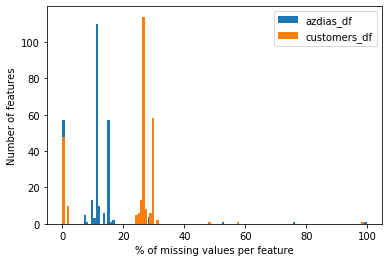

In [123]:
plt.figure()
plt.hist(missing_vals_df["azdias_df"].values, bins=128, label="azdias_df");
plt.hist(missing_vals_df["customers_df"].values, bins=128, label="customers_df");
plt.xlabel("% of missing values per feature");
plt.ylabel("Number of features");
plt.legend();

**Per features, there are gloablly more missing values in the customers_df than in the azdias_df** <br/>
**There is only a few features with more than 30% missing values**

## 1. 3. 9. Check the amount of missing values for each instances

In [114]:
def get_missing_val_instance_df(azdias_df, customers_df):
    df = pd.DataFrame(index=[], columns=["azdias_df", "customers_df"])
    for row in azdias_df.index:
        df.loc[row, "azdias_df"] = azdias_df.loc[row].isna().sum() / azdias_df.shape[1]*100
        df.loc[row, "customers_df"] = customers_df.loc[row].isna().sum() / customers_df.shape[1]*100
    return df
missing_val_instance_df = get_missing_val_instance_df(azdias_df, customers_df)

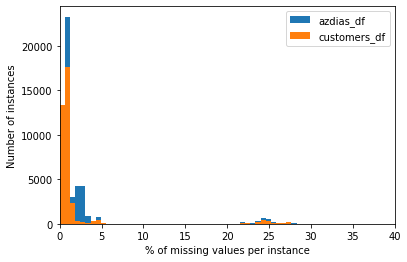

In [122]:
plt.figure()
plt.hist(missing_val_instance_df["azdias_df"].values, bins=128, label="azdias_df");
plt.hist(missing_val_instance_df["customers_df"].values, bins=128, label="customers_df");
plt.xlabel("% of missing values per instance");
plt.ylabel("Number of instances");
plt.xlim([0, 40])
plt.legend();

## 1. 3. 10. Remove features with a missing value above a certain threshold

## **Part 1: Customer Segmentation Report**

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

## Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [ ]:
mailout_train = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')

## Part 3: Kaggle Competition

Now that you've created a model to predict which individuals are most likely to respond to a mailout campaign, it's time to test that model in competition through Kaggle. If you click on the link [here](http://www.kaggle.com/t/21e6d45d4c574c7fa2d868f0e8c83140), you'll be taken to the competition page where, if you have a Kaggle account, you can enter. If you're one of the top performers, you may have the chance to be contacted by a hiring manager from Arvato or Bertelsmann for an interview!

Your entry to the competition should be a CSV file with two columns. The first column should be a copy of "LNR", which acts as an ID number for each individual in the "TEST" partition. The second column, "RESPONSE", should be some measure of how likely each individual became a customer – this might not be a straightforward probability. As you should have found in Part 2, there is a large output class imbalance, where most individuals did not respond to the mailout. Thus, predicting individual classes and using accuracy does not seem to be an appropriate performance evaluation method. Instead, the competition will be using AUC to evaluate performance. The exact values of the "RESPONSE" column do not matter as much: only that the higher values try to capture as many of the actual customers as possible, early in the ROC curve sweep.

In [ ]:
mailout_test = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TEST.csv', sep=';')